## 1(A):

By definition of likelihood function:
$$\mathcal{L}(\lambda) = \prod_{i=1}^{N} p(x_i; \lambda)$$
$$\mathcal{L}(\lambda) =  \prod_{i=1}^{N} (2\lambda x_i \exp(-\lambda x_i^2))$$
$$\mathcal{L}(\lambda) = (2\lambda)^{N} \prod_{i=1}^{N} x_i \cdot \exp(-\lambda(\sum_{i=1}^{N} x_i^2 ))$$
$$ \ell(\mu) = ln(\mathcal{L}(\lambda)) =  N \ln(2) +  N \ln(\lambda) + C - \lambda(\sum_{i=1}^{N} x_i^2) $$
$$ 0 = \frac{d}{d\lambda}\ell(\mu) = \frac{N}{\lambda} - \sum_{i=1}^{N} x_i^2 $$
$$ \frac{N}{\lambda} = \sum_{i=1}^{N} x_i^2 $$
$$ \lambda = \frac{N}{\sum_{i=1}^{N} x_i^2}$$

/var/folders/3y/917bfx25513c96jg7q7w9z8m0000gn/T/ipykernel_61856/1381745441.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


The MLE of λ is: 1.1657225806056337


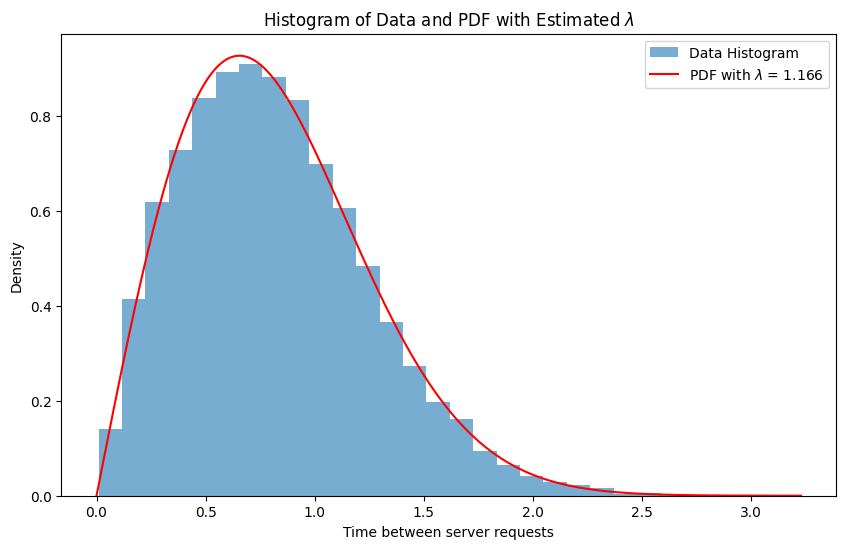

In [1]:
## 1(b):
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("traffic.csv",  sep='\s+', header=None)

values = data[0]
sum_of_squares = np.sum(values**2)
N = len(values)

lambda_mle = N / sum_of_squares

print(f"The MLE of λ is: {lambda_mle}")

## 1(c);

def pdf(x, lambda_):
    return 2 * lambda_ * x * np.exp(-lambda_ * x**2)

# Generate a range of x values for plotting the PDF
x_plot = np.linspace(0, max(values), 1000)

# Compute the PDF values for the plot
pdf_values = pdf(x_plot, lambda_mle)

# Plotting
plt.figure(figsize=(10, 6))

# Histogram of the data
plt.hist(values, bins=30, density=True, alpha=0.6, label='Data Histogram')

# PDF plot
plt.plot(x_plot, pdf_values, label=f'PDF with $\lambda$ = {lambda_mle:.3f}', color='red')

plt.xlabel('Time between server requests')
plt.ylabel('Density')
plt.title('Histogram of Data and PDF with Estimated $\lambda$')
plt.legend()
plt.show()


## 1(C) continued: 

The comparison between the histogram of the observed data and the probability density function (PDF) plot, with the parameter $\lambda$ estimated using Maximum Likelihood Estimation (MLE) at 1.166, demonstrates a good fit between our theoretical model and the actual data distribution. This alignment indicates that the estimated parameter value effectively captures the underlying pattern of server request intervals, validating the choice of our model for this dataset. The close match between the model's prediction (PDF curve) and the empirical data (histogram) suggests that the model, characterized by the PDF $p(x; \lambda) = 2\lambda x \exp(-\lambda x^2)$, is appropriate for describing the distribution of time intervals between server requests, with $\lambda$ finely tuning the model to align with observed realities. MLE, in this context, serves as a tool to optimize the model parameters, ensuring that our theoretical representation matches the observed data as closely as possible.


In [2]:
# 2(a):

import pandas as pd
import matplotlib.pyplot as plt
import math

data = pd.read_csv("cardiac.csv")

contingency_table = pd.crosstab(data['gender'], data['hxofHT'])
# Use the pandas styling to make the table more visually appealing
styled_table = contingency_table.style \
    .background_gradient(cmap='coolwarm') \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='red') \
    .set_properties(**{'color': 'black', 'border-color': 'black', 'border-width': '1px', 'border-style': 'solid'}) \
    .set_caption("Contingency Table: Gender vs. History of Hypertension")

# Display the styled table
styled_table


hxofHT,0,1
gender,,
0,144,76
1,249,89


In [3]:
# 2(b):
from scipy.special import comb

N = contingency_table.values.sum()
a, b, c, d = contingency_table.iloc[0, 0], contingency_table.iloc[0, 1], contingency_table.iloc[1, 0], contingency_table.iloc[1, 1]
print(a, b, c, d)

def table_probability(a, b, c, d, n):
    probability = (comb(a + b, b) * comb(c + d, d)) / comb(n, b + d)
    return probability

p = table_probability(a, b, c, d, N)

print(p) 

144 76 249 89
0.008846092806846154


## 2(c): The null hypothesis would be that there is no difference in frequency of hypertension between men and women.

In [4]:
# 2(d):

total_women = c + d
affected = b + d

for new_d in range(d + 1 , min(total_women, affected)):
    a += 1
    b -= 1
    c -= 1
    p += table_probability(a, b, c, new_d, N)
    
    
print(p)


0.9848064019135875


## Because p = 0.984, we cannot reject the null hypothesis that there is no difference in frequency of hypertension between men and women. The null hypothesis can be rejected if the p-value is less than or equal to 0.05.

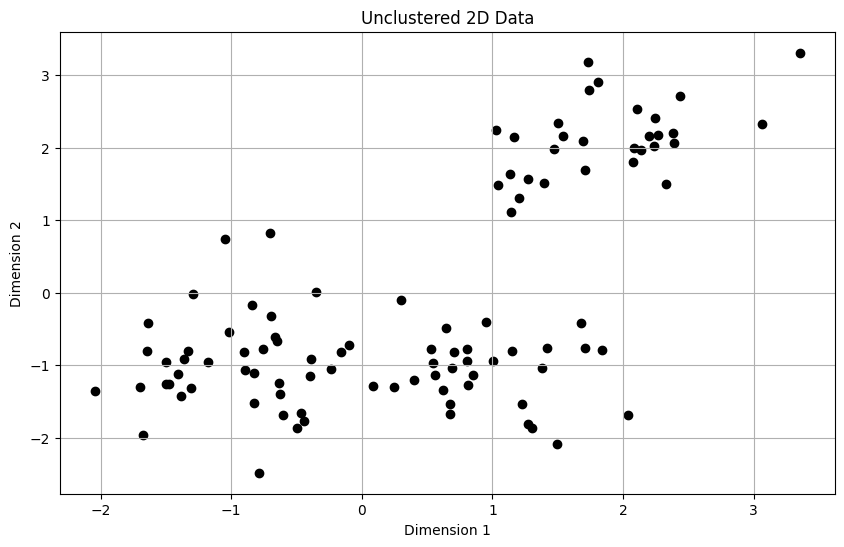

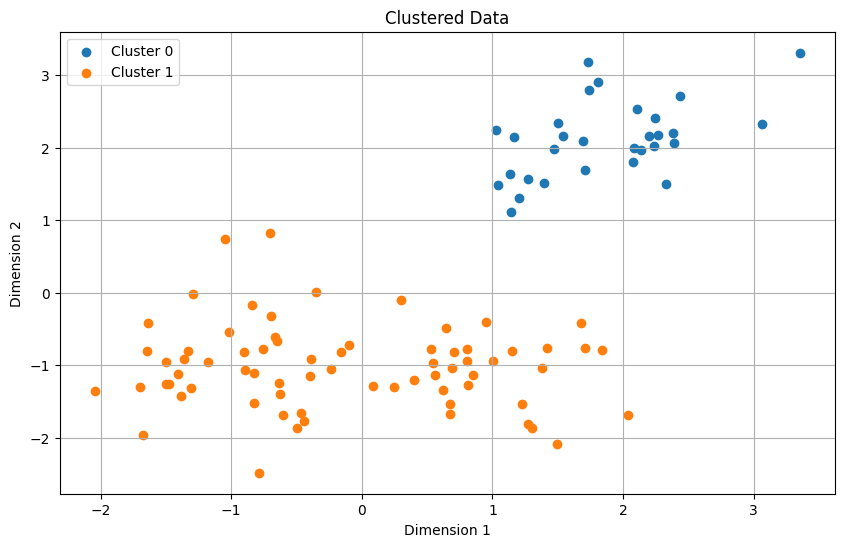

In [5]:
## 3:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

data = pd.read_csv("2D_data.txt",  sep='\s+', header=None)

plt.figure(figsize=[10,6])
plt.scatter(data[0], data[1], c='black', marker='o')
plt.title('Unclustered 2D Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


def generate_centers(data, k):
    # selects k unique random incides from array
    indices = np.random.choice(data.shape[0], size = k, replace=False)
    # iloc allows selection by index
    centers = data.iloc[indices].values
    return centers

def k_means_cluster(data, k, num_iterations=100):
    centers = generate_centers(data, k)
    for iteration in range(num_iterations):
        clusters = [[] for _ in range(k)]
        new_centers = np.zeros((k, data.shape[1]))
        for index, row in data.iterrows():
            point = row.to_numpy()
            closest_center, shortest_distance = min(enumerate(centers), key=lambda x: np.linalg.norm(point - x[1]))
            clusters[closest_center].append(index)
        
        # Recalculate centers
        for i, cluster in enumerate(clusters):
            if len(cluster) > 0:  # Avoid division by zero
                new_centers[i] = data.iloc[cluster].mean().to_numpy()
        
        # Check for convergence (if centers do not change, break)
        if np.allclose(centers, new_centers):
            break
        centers = new_centers

    # Calculate total inertia
    inertia = 0
    for i, cluster in enumerate(clusters):
        points = data.iloc[cluster].to_numpy()
        inertia += np.sum((points - centers[i])**2)

    return clusters, inertia, centers

        
clusters, _, _= k_means_cluster(data, 2)   

plt.figure(figsize=(10, 6))

# Iterate over each cluster
for cluster_id, cluster_indices in enumerate(clusters):
    # Extract the data points corresponding to the current cluster
    cluster_points = data.iloc[cluster_indices]
    plt.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {cluster_id}')
    
plt.title('Clustered Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.grid(True)
plt.show()



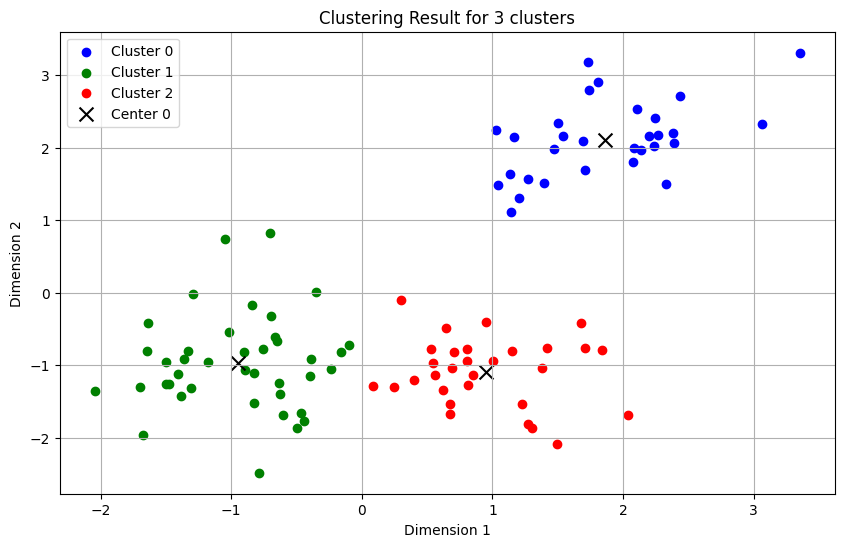

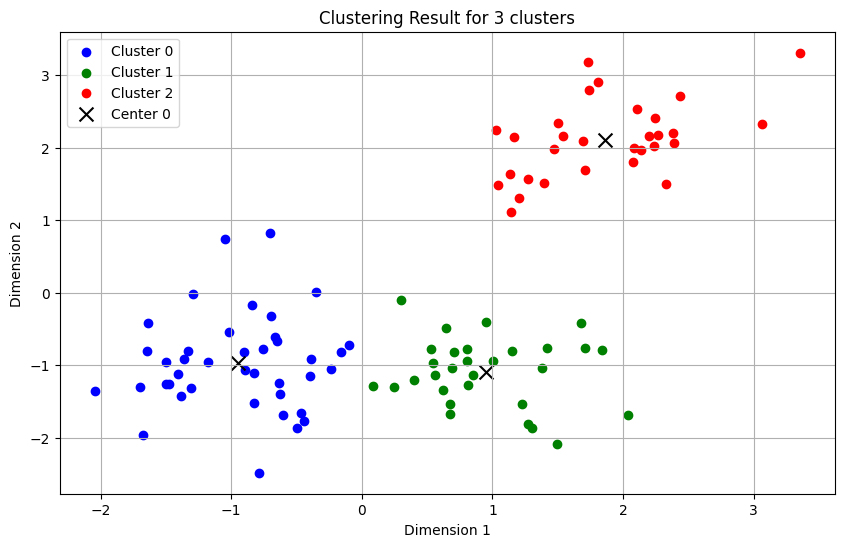

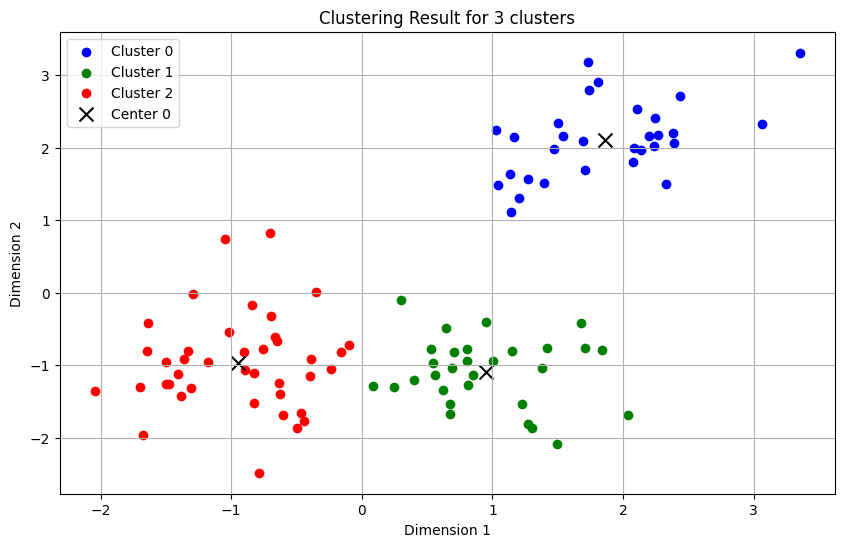

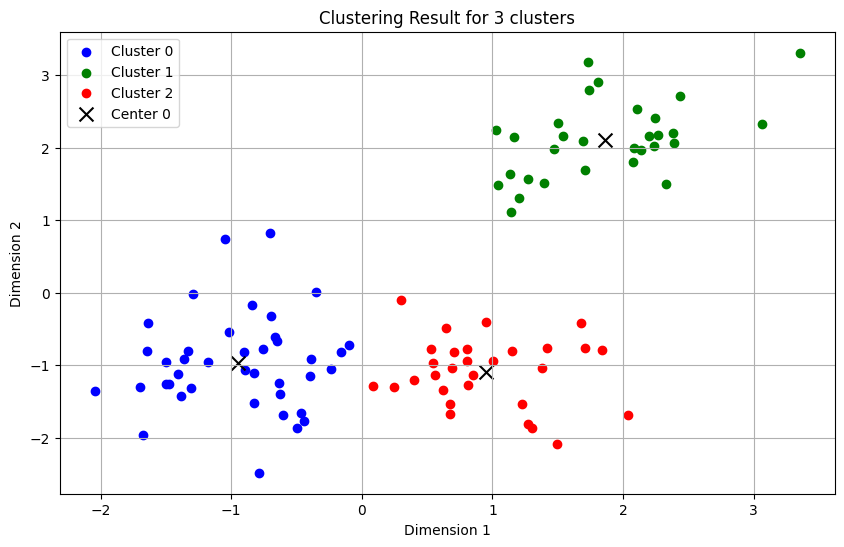

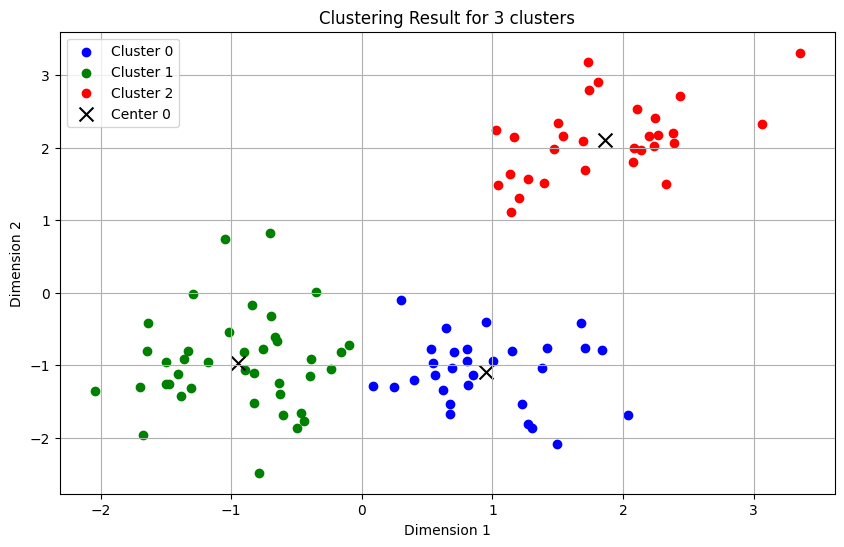

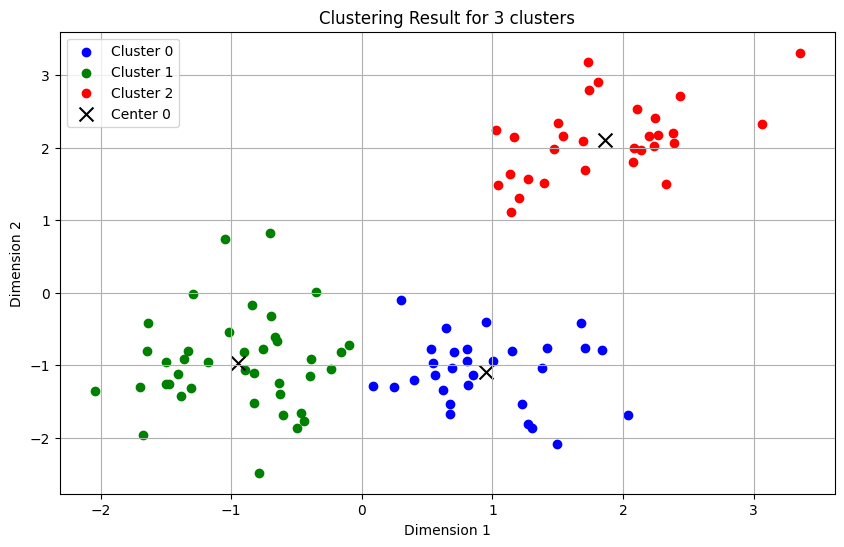

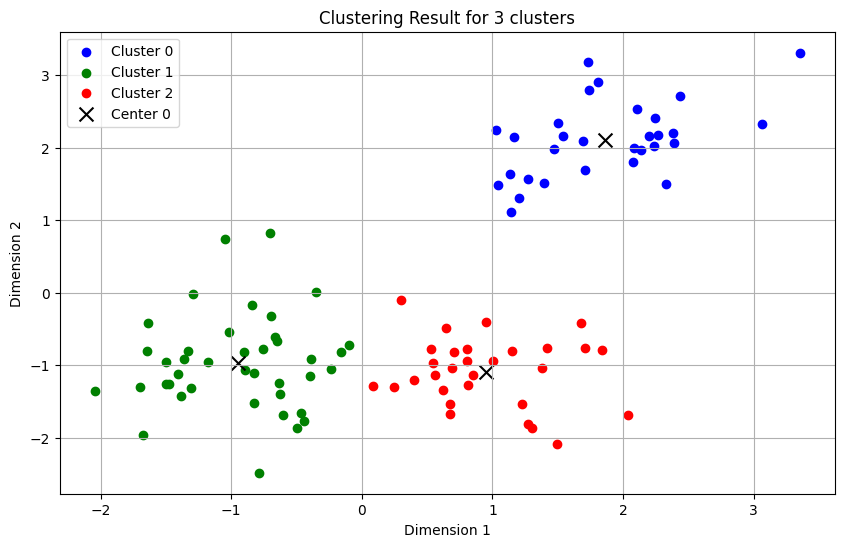

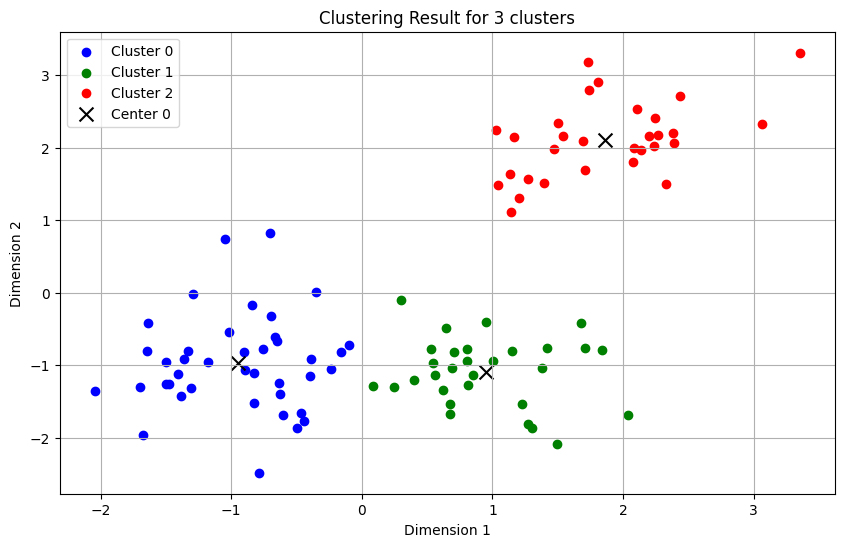

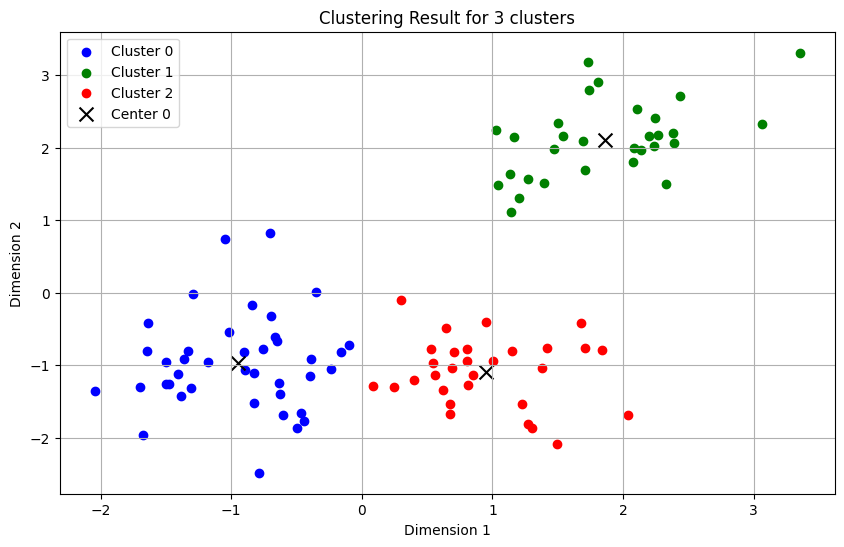

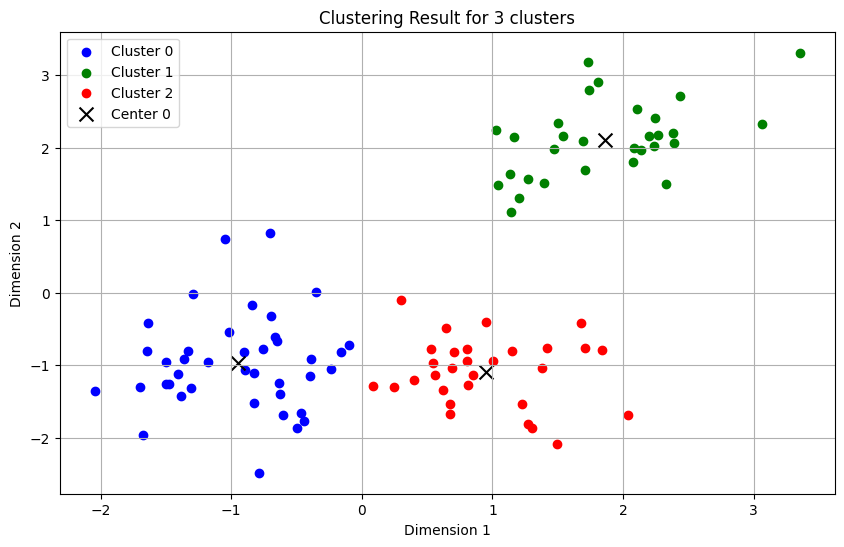

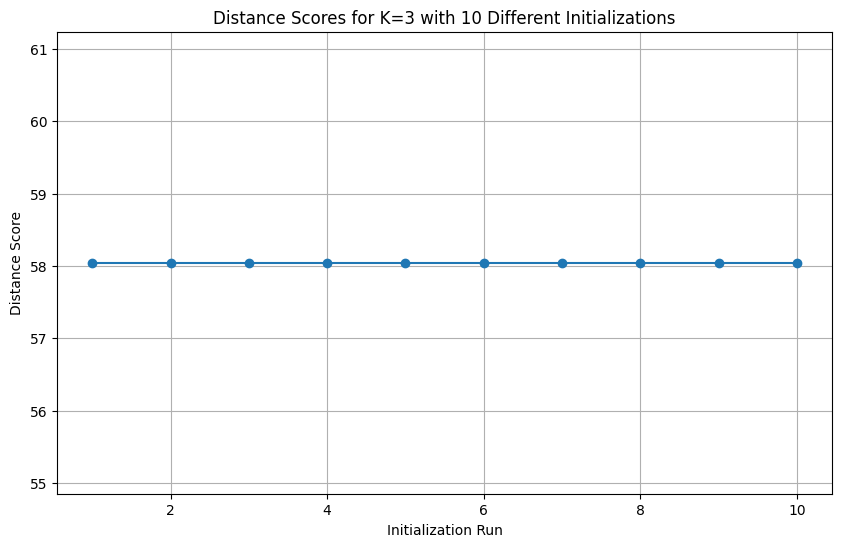

In [6]:
import numpy as np


def perform_clustering_and_plot(data, k, n_init=10, title=''):
    inertias = []

    for i in range(n_init):
        clusters, inertia, centers = k_means_cluster(data, k)
        inertias.append(inertia)

        # Plot each cluster
        plt.figure(figsize=(10, 6))
        colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown']  # For different clusters
        for cluster_id, cluster_indices in enumerate(clusters):
            cluster_points = data.iloc[cluster_indices]
            plt.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {cluster_id}', color=colors[cluster_id % len(colors)])
        
        # Plot the centers
        for i, center in enumerate(centers):
            plt.scatter(center[0], center[1], color='black', marker='x', s=100, label=f'Center {i}' if i == 0 else "")
        
        plt.title(f'Clustering Result for {k} clusters')
        plt.xlabel('Dimension 1')
        plt.ylabel('Dimension 2')
        plt.legend()
        plt.grid(True)
        plt.show()

    # return best_clusters, inertias, best_centers 
    return inertias

distance_scores = perform_clustering_and_plot(data, 3, 10, "hello")
plt.figure(figsize=[10,6])
plt.plot(range(1, 11), distance_scores, marker='o')
plt.title('Distance Scores for K=3 with 10 Different Initializations')
plt.xlabel('Initialization Run')
plt.ylabel('Distance Score')
plt.grid(True)
plt.show()



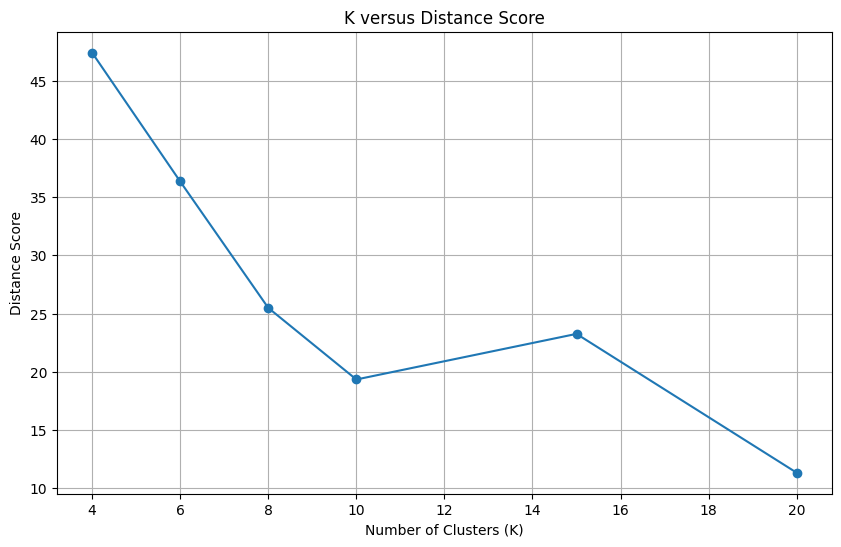

In [7]:
# Part 4 of Question 3
k_values = [4, 6, 8, 10, 15, 20]
distance_scores = []
for k in k_values:
    _, distance_score, _ = k_means_cluster(data, k)
    distance_scores.append(distance_score)
    
# Plot K versus distance score
plt.figure(figsize=[10,6])
plt.plot(k_values, distance_scores, marker='o')
plt.title('K versus Distance Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distance Score')
plt.grid(True)
plt.show()

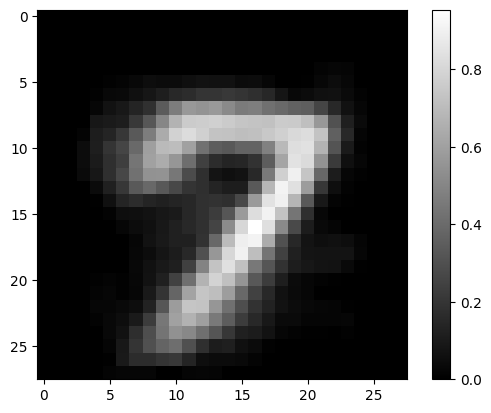

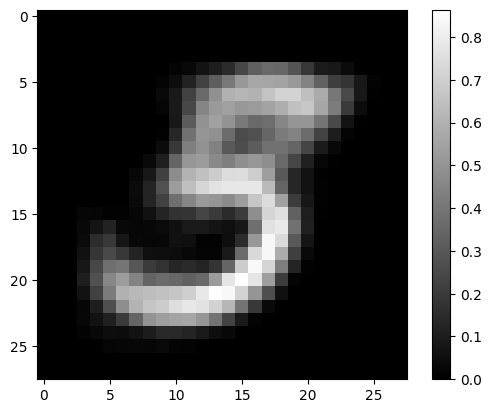

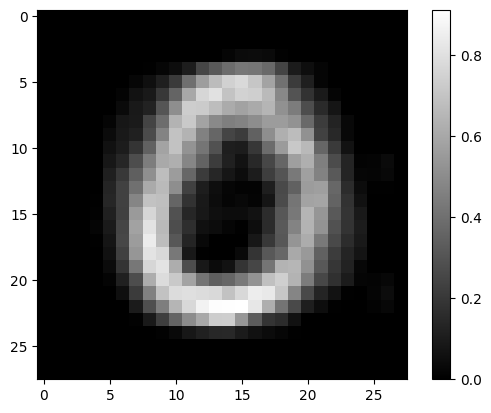

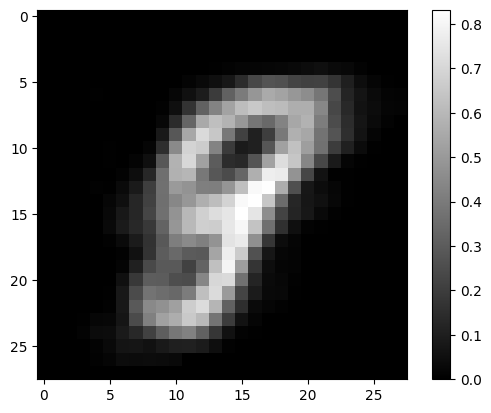

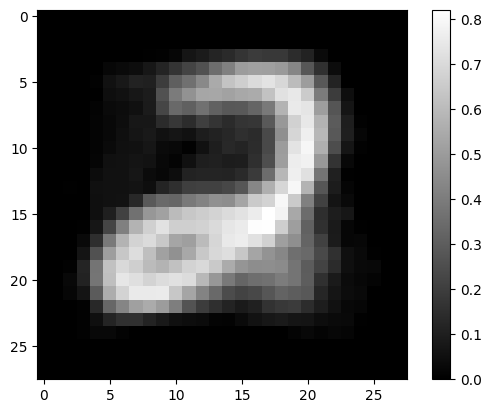

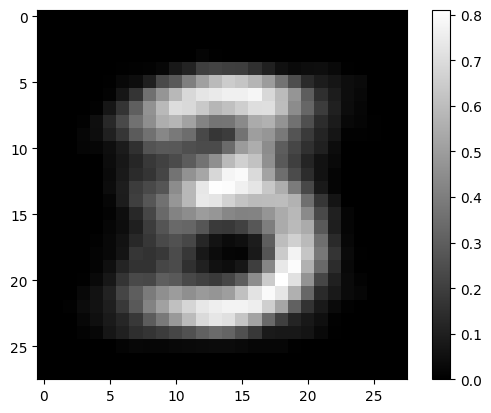

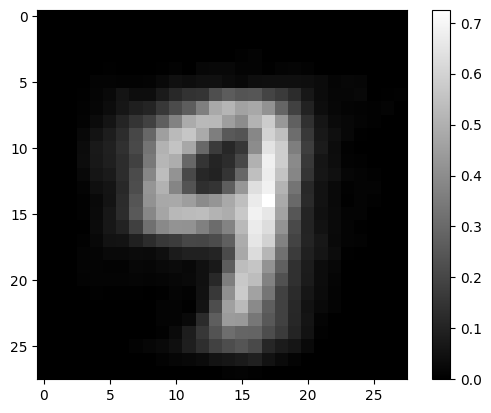

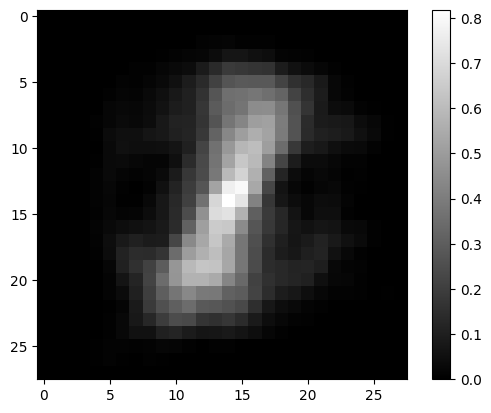

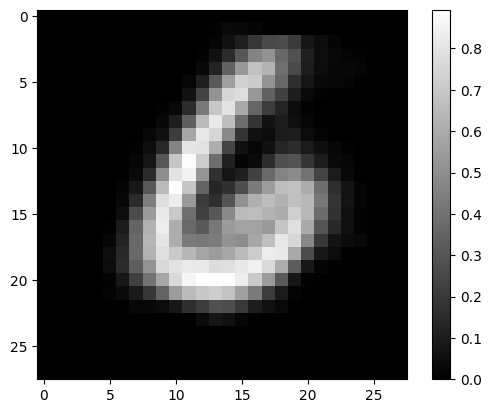

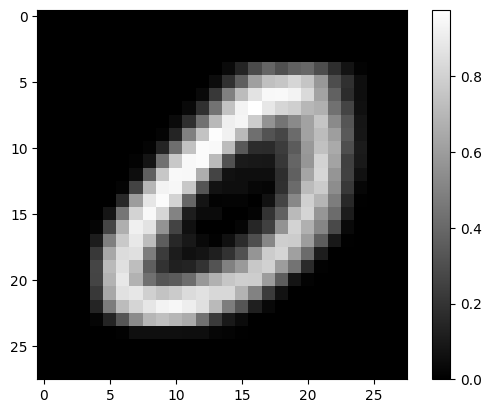

In [8]:
# 4

## For TrainX.txt
data = pd.read_csv("trainX.txt",  sep='\s+', header=None)
converted_data = data.apply(lambda row: np.array([float(pixel) for pixel in row[0].split(",")]), axis=1) # convert data

# Convert the Series of arrays (each element in 'converted_data' is now an array) into a NumPy matrix
matrix_data = np.stack(converted_data.values)
data = pd.DataFrame(matrix_data)

clusters, _, mean_images = k_means_cluster(data, 10)

image_row = mean_images[0]  # Convert the first row to a numpy array


def plot(image_row):
    # Convert the list of integers into a numpy array and reshape
    image_2d = image_row.reshape(28, 28)
    
    # Plot the image
    plt.imshow(image_2d, cmap='gray')  # 'gray' colormap looks more natural for handwriting
    plt.colorbar()
    plt.show()

for row in mean_images:
    plot(row)
    



# ## For testX.txt
# data = pd.read_csv("testX.txt",  sep='\s+', header=None)
# converted_data = data.apply(lambda row: np.array([float(pixel) for pixel in row[0].split(",")]), axis=1) # convert data

# # Convert the Series of arrays (each element in 'converted_data' is now an array) into a NumPy matrix
# matrix_data = np.stack(converted_data.values)
# data = pd.DataFrame(matrix_data)

# _, _, mean_images = k_means_cluster(data, 10)

# image_row = mean_images[0]  # Convert the first row to a numpy array

# # Convert the list of integers into a numpy array and reshape
# image_2d = np.array(image_row).reshape(28, 28)

# # Plot the image
# plt.imshow(image_2d, cmap='gray')  # 'gray' colormap looks more natural for handwriting
# plt.colorbar()
# plt.show()
# print(data)
# #
